# Client Insights: Customer Segmentation & Business Value Analysis

## Executive Summary

This notebook provides a comprehensive customer segmentation analysis designed to drive actionable business decisions and maximize marketing ROI. 

**Key Objectives:**
1. Identify 4-6 meaningful customer segments using advanced clustering techniques
2. Predict campaign response rates to optimize marketing spend


---
## Table of Contents

1. [Data Loading & Preprocessing](#1-data-loading--preprocessing)
2. [Phase 1: Customer Segmentation](#phase-1-customer-segmentation)
   - Feature Engineering
   - Clustering Analysis
   - Segment Profiling & Naming
3. [Phase 2: Advanced Analytics](#phase-2-advanced-analytics)
   - Campaign Response Prediction
   - Customer Lifetime Value Analysis
   - Next Best Action Engine
   - Churn Risk & Retention Strategy
4. [Phase 3: Business Impact Dashboard](#phase-3-business-impact-dashboard)
   - ROI Calculations
   - Decision Dashboard
   - Strategic Recommendations

---

## 1. Data Loading & Preprocessing

We begin by loading the customer personality data and performing initial data quality checks.

In [193]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [194]:
# Load data
import kagglehub
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
df = pd.read_csv(path + '/marketing_campaign.csv', delimiter='\t')

print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
df.head()

Dataset shape: (2240, 29)
Missing values: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [195]:
# Get the summary statistics of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Quality & Cleaning

Remove outliers and handle missing values to ensure robust analysis.

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Year_Birth'}>]], dtype=object)

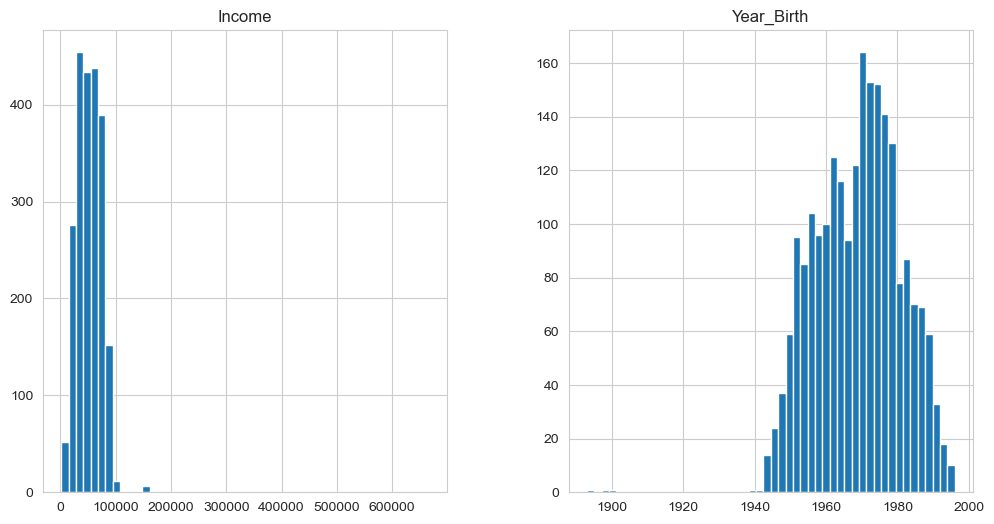

In [196]:
df[['Income','Year_Birth']].hist(bins=50)

In [197]:
# Remove outliers
print(f"Original dataset size: {len(df)}")

# Remove unrealistic birth years and income outliers
df = df[(df['Year_Birth'] > 1935) & (df['Income'] < 200000)]
df = df.dropna()

print(f"After cleaning: {len(df)} rows ({(1 - len(df)/2240)*100:.1f}% removed)")
print(f"\n✓ Data cleaning complete")

Original dataset size: 2240
After cleaning: 2212 rows (1.2% removed)

✓ Data cleaning complete


---
## Phase 1: Customer Segmentation

### Feature Engineering

We create meaningful features that capture customer behavior, value, and engagement patterns.

In [198]:
# Calculate Age and Customer Tenure
df['Age'] = 2021 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Tenure_Days'] = (pd.to_datetime('2021-01-01') - df['Dt_Customer']).dt.days

# Family size
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1
df['Has_Children'] = ((df['Kidhome'] + df['Teenhome']) > 0).astype(int)
df['Living_Alone'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'] else 0)

# Education level (simplified)
education_mapping = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education_Level'] = df['Education'].map(education_mapping)

In [199]:
# Total Spending
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Spending per category ratio
for category in ['MntWines', 'MntMeatProducts', 'MntFish Products', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']:
    if category in df.columns:
        df[f'{category}_Ratio'] = df[category] / (df['Total_Spending'] + 1)


In [200]:
# Campaign responsiveness score
df['Campaign_Response_Score'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'])

# Total purchases and channel preferences
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df['Web_Purchase_Ratio'] = df['NumWebPurchases'] / (df['Total_Purchases'] + 1)
df['Catalog_Purchase_Ratio'] = df['NumCatalogPurchases'] / (df['Total_Purchases'] + 1)
df['Store_Purchase_Ratio'] = df['NumStorePurchases'] / (df['Total_Purchases'] + 1)

# Average order value
df['Avg_Order_Value'] = df['Total_Spending'] / (df['Total_Purchases'] + 1)

df = df.dropna()

### Clustering Analysis

We use K-means clustering to identify distinct customer segments. The optimal number of clusters is determined using the Elbow method and Silhouette analysis.

In [201]:
# For clustering, we typically want to exclude categorical variables (unless properly encoded), IDs, data leak features,
# and highly correlated/redundant variables. Here, we'll use all available numeric features except obvious identifiers or target-like columns.

exclude_cols = [
    'ID',
    'Response',             # Target
    'Z_CostContact',        # Constant
    'Z_Revenue',            # Constant
    'Dt_Customer',          # Date - already engineered tenure/recency
    'Education',            # Categorical raw
    'Marital_Status',       # Categorical raw
    
]

# Select all numeric columns except excluded
clustering_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in exclude_cols
]

# Prepare data for clustering
X_cluster = df[clustering_features].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"✓ Prepared {X_scaled.shape[0]} customers with {X_scaled.shape[1]} features for clustering")

✓ Prepared 2212 customers with 40 features for clustering


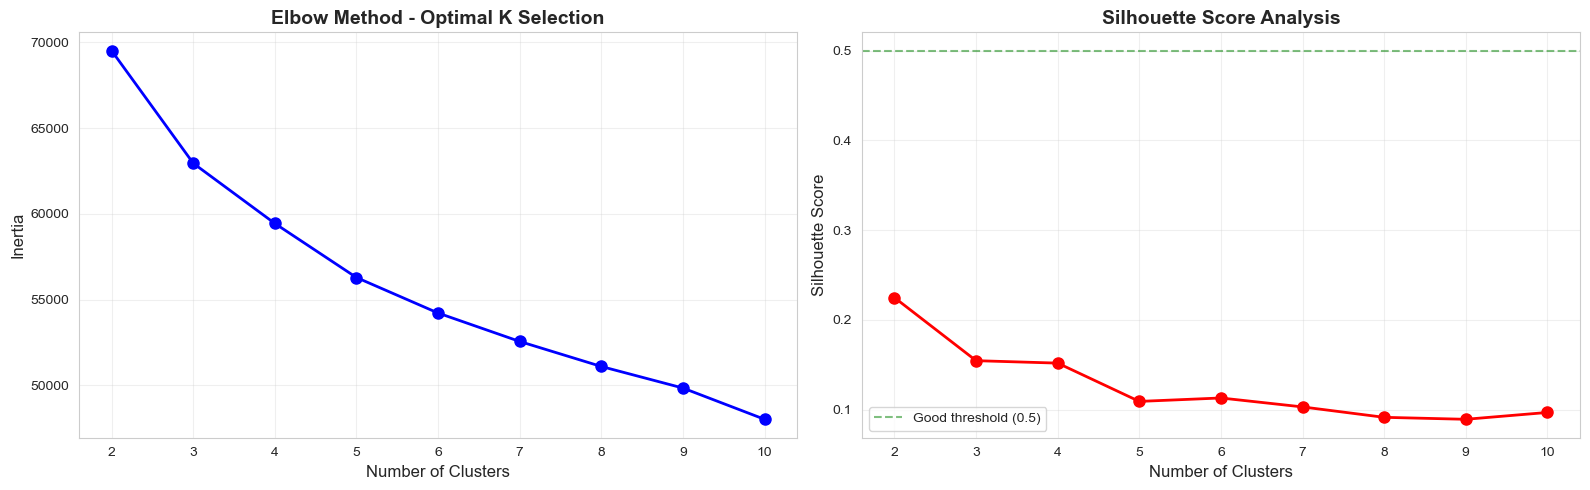


Silhouette Scores:
  K=2: 0.2248
  K=3: 0.1545
  K=4: 0.1518
  K=5: 0.1091
  K=6: 0.1130
  K=7: 0.1030
  K=8: 0.0914
  K=9: 0.0892
  K=10: 0.0968

✓ Recommended number of clusters: 4


In [202]:
# Determine optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method - Optimal K Selection', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.5, color='g', linestyle='--', alpha=0.5, label='Good threshold (0.5)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nSilhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"  K={k}: {score:.4f}")
    
# Recommend optimal K
optimal_k = silhouette_scores.index(max(silhouette_scores[2:6])) + 2  # Between 4-8 clusters
print(f"\n✓ Recommended number of clusters: {optimal_k}")

In [203]:
# Fit final clustering model
optimal_k = 4

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=50, max_iter=500)
df['Segment'] = kmeans_final.fit_predict(X_scaled)

print(f"Silhouette Score: {silhouette_score(X_scaled, df['Segment']):.4f}")
print(df['Segment'].value_counts().sort_index())


Silhouette Score: 0.1520
Segment
0    644
1    451
2    955
3    162
Name: count, dtype: int64


### Segment Profiling & Business-Friendly Naming

We analyze each segment's characteristics and assign meaningful business names.

In [204]:
# Create comprehensive segment profiles
segment_profiles = df.groupby('Segment').agg({
    'Income': ['median', 'mean'],
    'Age': ['median', 'mean'],
    'Total_Spending': ['median', 'mean', 'sum'],
    'Campaign_Response_Score': ['mean', 'sum'],
    'Total_Purchases': ['median', 'mean'],
    'Family_Size': 'mean',
    'Has_Children': 'mean',
    'Avg_Order_Value': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Web_Purchase_Ratio': 'mean',
    'Catalog_Purchase_Ratio': 'mean',
    'Store_Purchase_Ratio': 'mean'
}).round(2)

segment_profiles['Customer_Count'] = df.groupby('Segment').size()
segment_profiles['Pct_of_Total'] = (df.groupby('Segment').size() / len(df) * 100).round(1)

print(segment_profiles)

          Income              Age        Total_Spending                   \
          median      mean median   mean         median     mean     sum   
Segment                                                                    
0        57099.0  56749.43   57.0  57.11          606.0   672.91  433355   
1        72940.0  72428.04   52.0  52.95         1196.0  1237.17  557963   
2        33569.0  33985.56   47.0  48.47           60.0    90.86   86775   
3        82573.5  81882.70   49.0  51.02         1676.5  1636.94  265184   

        Campaign_Response_Score      Total_Purchases        Family_Size  \
                           mean  sum          median   mean        mean   
Segment                                                                   
0                          0.23  148            16.0  16.36        2.22   
1                          0.21   93            19.0  19.17        1.22   
2                          0.08   74             5.0   5.65        2.23   
3                

In [205]:
# Assign business-friendly names based on segment characteristics
# Only 4 segments included in the mapping
segment_names = {
    0: 'High-Value Customers',
    1: 'Budget-Conscious Families',
    2: 'Mature Loyalists',
    3: 'Price-Sensitive Shoppers'
}

df['Segment_Name'] = df['Segment'].map(segment_names)

for seg, name in segment_names.items():
    count = len(df[df['Segment'] == seg])
    pct = count / len(df) * 100
    print(f"Segment {seg}: {name} ({count} customers, {pct:.1f}%)")

Segment 0: High-Value Customers (644 customers, 29.1%)
Segment 1: Budget-Conscious Families (451 customers, 20.4%)
Segment 2: Mature Loyalists (955 customers, 43.2%)
Segment 3: Price-Sensitive Shoppers (162 customers, 7.3%)


### Segment Visualization

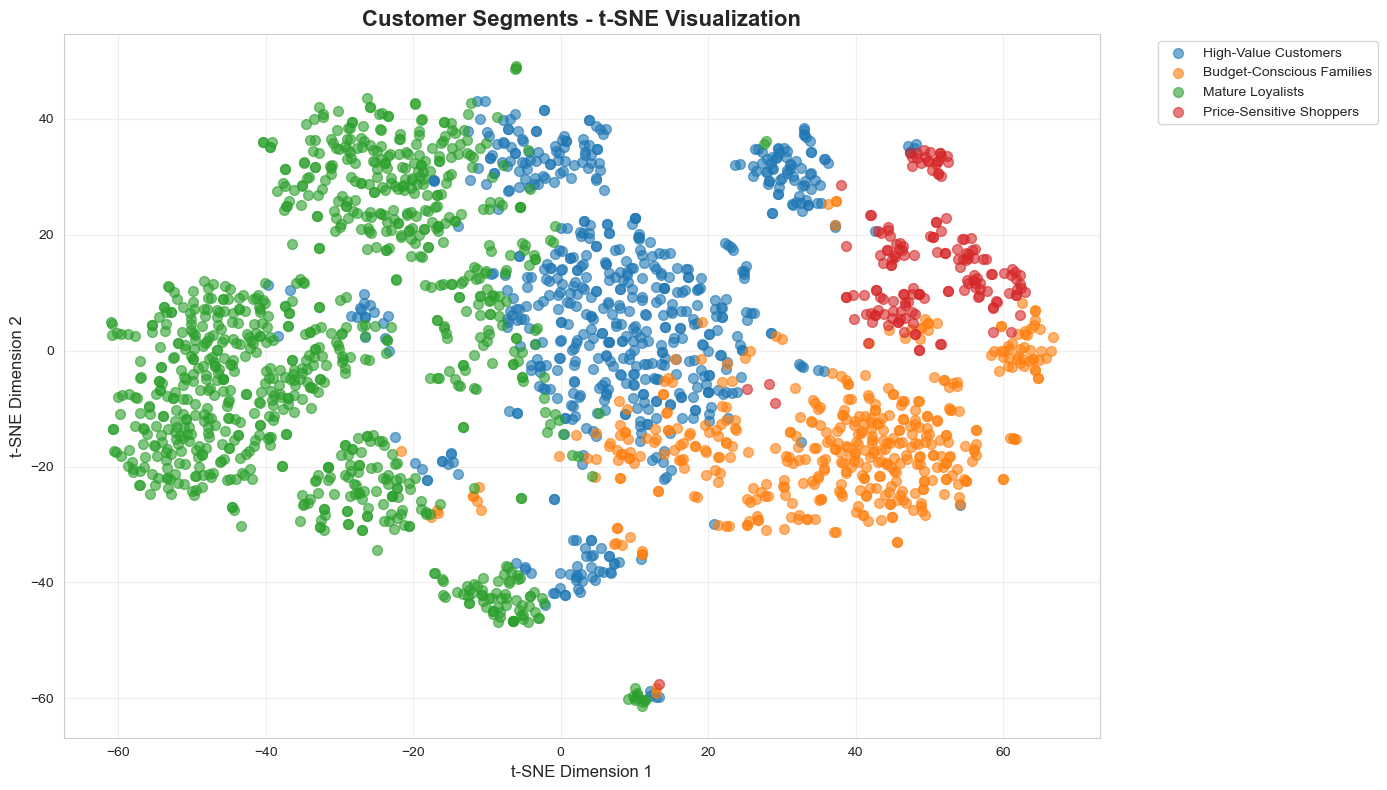

In [206]:
# t-SNE visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(14, 8))
for seg in sorted(df['Segment'].unique()):
    mask = df['Segment'] == seg
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                label=segment_names[seg], alpha=0.6, s=50)

plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('Customer Segments - t-SNE Visualization', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

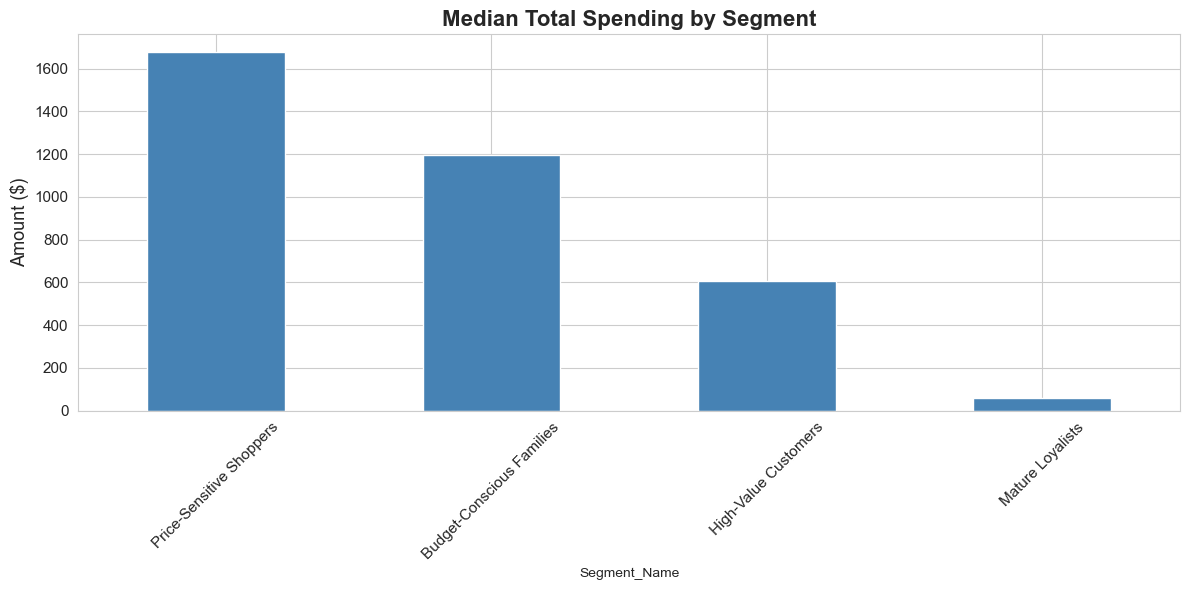

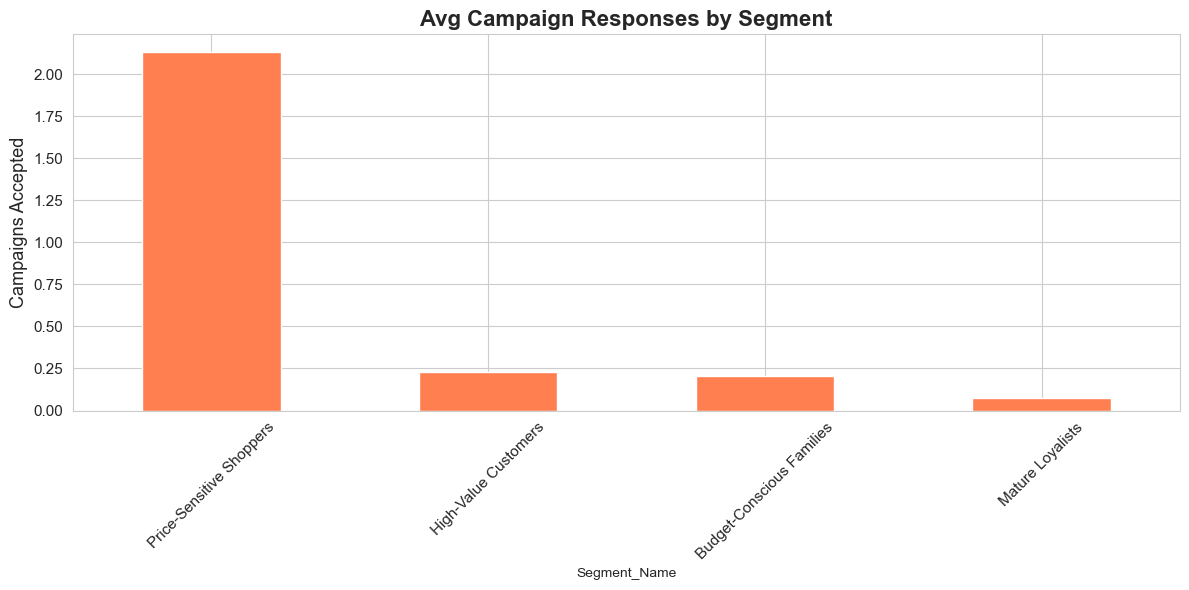

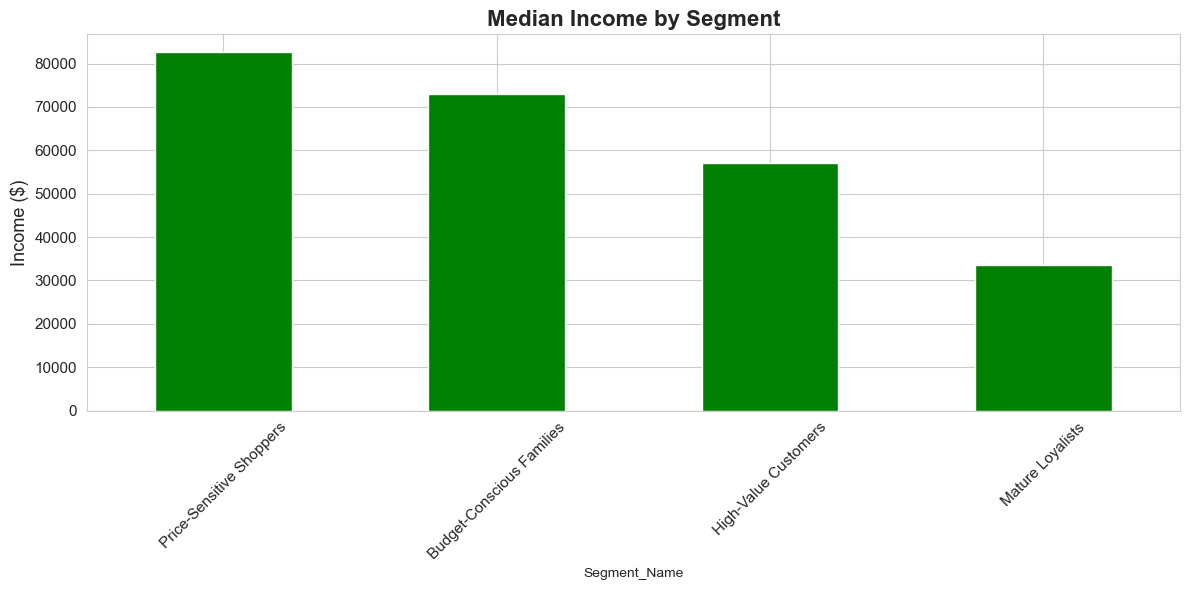

In [207]:
# Median Total Spending by Segment
plt.figure(figsize=(12, 6))
segment_spending = df.groupby('Segment_Name')['Total_Spending'].median().sort_values(ascending=False)
segment_spending.plot(kind='bar', color='steelblue')
plt.title('Median Total Spending by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Amount ($)', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Avg Campaign Responses by Segment
plt.figure(figsize=(12, 6))
segment_campaign = df.groupby('Segment_Name')['Campaign_Response_Score'].mean().sort_values(ascending=False)
segment_campaign.plot(kind='bar', color='coral')
plt.title('Avg Campaign Responses by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Campaigns Accepted', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Median Income by Segment
plt.figure(figsize=(12, 6))
segment_income = df.groupby('Segment_Name')['Income'].median().sort_values(ascending=False)
segment_income.plot(kind='bar', color='green')
plt.title('Median Income by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Income ($)', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

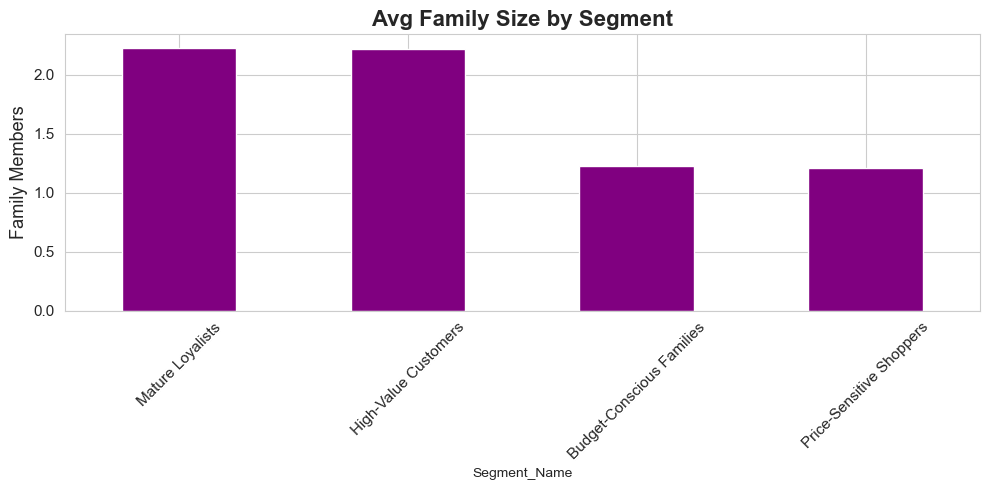

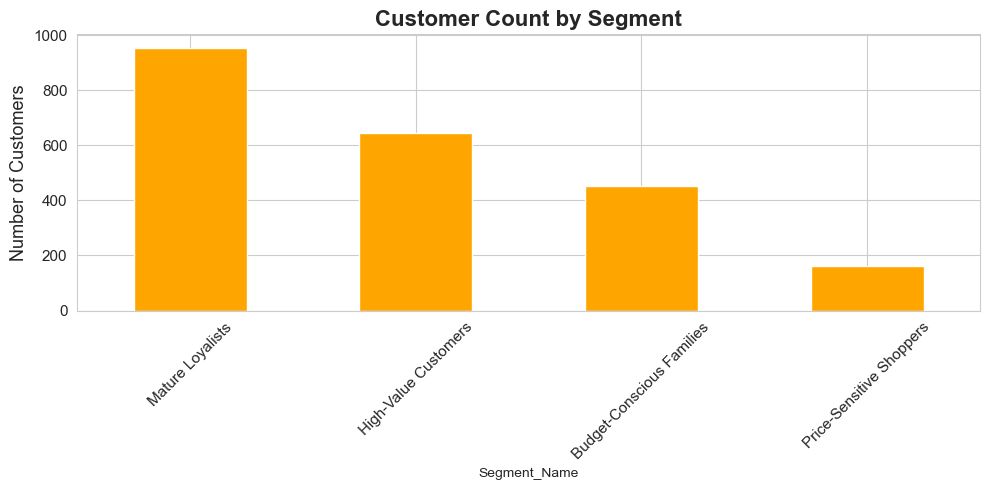

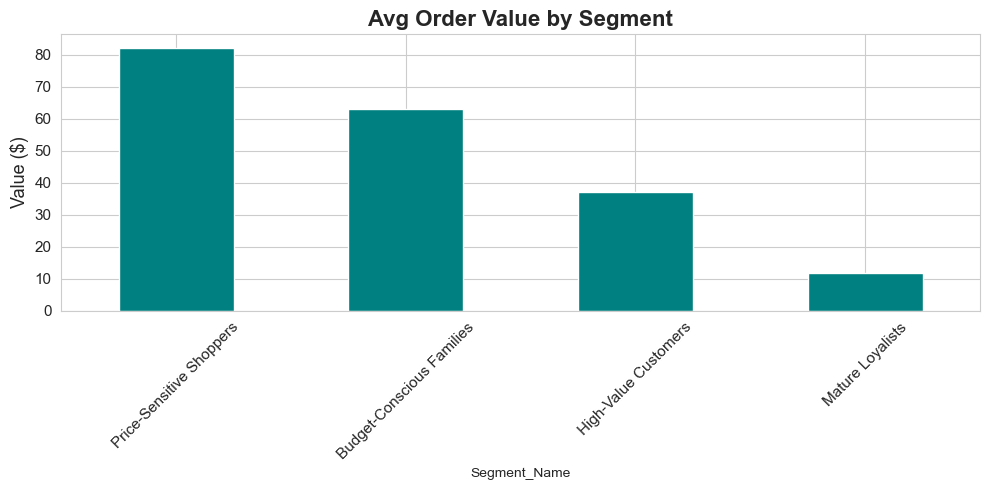

In [208]:
# Plot each as a separate figure rather than subplots

# Family Size
plt.figure(figsize=(10, 5))
segment_family = df.groupby('Segment_Name')['Family_Size'].mean().sort_values(ascending=False)
segment_family.plot(kind='bar', color='purple')
plt.title('Avg Family Size by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Family Members', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Customer Count
plt.figure(figsize=(10, 5))
segment_count = df['Segment_Name'].value_counts().sort_values(ascending=False)
segment_count.plot(kind='bar', color='orange')
plt.title('Customer Count by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Number of Customers', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Average Order Value
plt.figure(figsize=(10, 5))
segment_aov = df.groupby('Segment_Name')['Avg_Order_Value'].mean().sort_values(ascending=False)
segment_aov.plot(kind='bar', color='teal')
plt.title('Avg Order Value by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Value ($)', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


---
## Phase 2: Advanced Analytics

### 2.1 Campaign Response Prediction Model

Build a predictive model to identify which customers are most likely to respond to future campaigns.

In [209]:
# Prepare data for campaign response prediction
# Target: Whether the customer responded to the last marketing campaign
# One-hot encode 'Education' and 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df = df.drop('Dt_Customer', axis=1)

# Select features: all numeric columns except 'Response'
numeric_cols = df.select_dtypes(include='number').columns
# Fix: build X as a DataFrame, not a list of column names
X = df[[col for col in numeric_cols if col != 'Response']]
y = df['Response']

# Train-test split (now X and y have the same number of rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Response rate in training: {y_train.mean():.1%}")
print(f"Response rate in test: {y_test.mean():.1%}")

Training set: 1548 samples
Test set: 664 samples
Response rate in training: 15.1%
Response rate in test: 15.1%


In [214]:
# ADDED VALUE OF MLFLOW

# In this workflow, MLflow provides several key benefits:
# - Experiment Tracking: Every parameter combination, metric, and model artifact from Optuna hyperparameter optimization is automatically logged and organized in the MLflow tracking UI. This makes it easy to compare models and retrace steps.
# - Parameter/Metric Logging: All hyperparameters (from both Optuna trials and best model runs), as well as evaluation metrics (accuracy, precision, recall, F1, ROC AUC), are persisted and queryable via MLflow's UI or API, enabling fast model comparison and auditability.
# - Model Registry: Trained models for each classifier and the overall best model are saved as persistent MLflow artifacts, ready for versioning and deployment.
# - Reproducibility: Because all code, params, and artifacts are versioned, you can fully reproduce, revisit, or productionize any chosen run simply by referencing the MLflow run ID.

# The core machine learning and Optuna logic would work without MLflow, but you lose all the experiment management, comparison, and reproducibility benefits above.

import optuna
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import mlflow
import mlflow.sklearn

def objective(trial, clf_name):
    # Experiment tracking for every individual Optuna trial
    with mlflow.start_run(nested=True, run_name=f"{clf_name}_trial"):
        if clf_name == 'Logistic Regression':
            C = trial.suggest_loguniform('C', 1e-3, 10)
            solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
            model = LogisticRegression(random_state=42, max_iter=1000, C=C, solver=solver)
            mlflow.log_param('C', C)
            mlflow.log_param('solver', solver)
        elif clf_name == 'Random Forest':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 3, 20)
            min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
            model = RandomForestClassifier(
                random_state=42,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split
            )
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('min_samples_split', min_samples_split)
        elif clf_name == 'Gradient Boosting':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 2, 10)
            learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
            model = GradientBoostingClassifier(
                random_state=42,
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate
            )
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('learning_rate', learning_rate)
        else:
            raise ValueError(f"Unknown classifier: {clf_name}")

        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        mlflow.log_metric('roc_auc', roc_auc)
        return roc_auc

models = {
    'Logistic Regression': {},
    'Random Forest': {},
    'Gradient Boosting': {}
}

results = {}
best_models = {}

N_TRIALS = 30  # Can increase for higher quality tuning

# Wrap whole model selection process in an MLflow run
with mlflow.start_run(run_name="Model_Selection"):
    for clf_name in models.keys():
        # Each classifier gets its own nested run
        with mlflow.start_run(run_name=clf_name, nested=True):
            study = optuna.create_study(direction='maximize')
            study.optimize(lambda trial: objective(trial, clf_name), n_trials=N_TRIALS, show_progress_bar=False)

            best_params = study.best_params
            if clf_name == 'Logistic Regression':
                model = LogisticRegression(random_state=42, max_iter=1000, **best_params)
            elif clf_name == 'Random Forest':
                model = RandomForestClassifier(random_state=42, **best_params)
            elif clf_name == 'Gradient Boosting':
                model = GradientBoostingClassifier(random_state=42, **best_params)
            else:
                raise ValueError(f"Unknown classifier: {clf_name}")

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            results[clf_name] = {
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1 Score': f1,
                'ROC AUC': roc_auc
            }
            best_models[clf_name] = model

            # Log best hyperparameters, metrics, and trained model
            mlflow.log_params(best_params)
            mlflow.log_metric('accuracy', acc)
            mlflow.log_metric('precision', prec)
            mlflow.log_metric('recall', rec)
            mlflow.log_metric('f1_score', f1)
            mlflow.log_metric('roc_auc', roc_auc)
            mlflow.sklearn.log_model(model, f"{clf_name}_best_model")

    # Results comparison is still output to notebook, but MLflow stores everything for future analysis
    results_df = pd.DataFrame(results).T
    print(results_df.round(4))

    # Select, log, and register the best model for production use
    best_model_name = results_df['ROC AUC'].idxmax()
    best_model = best_models[best_model_name]
    print(f"\n✓ Best model: {best_model_name} (ROC AUC: {results_df.loc[best_model_name, 'ROC AUC']:.4f})")
    mlflow.log_param('best_model', best_model_name)
    mlflow.log_metric('best_roc_auc', results_df.loc[best_model_name, 'ROC AUC'])
    mlflow.sklearn.log_model(best_model, f"{best_model_name}_production")

[I 2025-12-11 12:06:35,990] A new study created in memory with name: no-name-739e2fff-aad8-40fe-9309-5224d6d2f69a
[I 2025-12-11 12:06:36,162] Trial 0 finished with value: 0.8892553191489362 and parameters: {'C': 0.26460932509885954, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8892553191489362.
[I 2025-12-11 12:06:36,580] Trial 1 finished with value: 0.7847163120567376 and parameters: {'C': 0.02370147742976801, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8892553191489362.
[I 2025-12-11 12:06:36,714] Trial 2 finished with value: 0.8468617021276595 and parameters: {'C': 0.02255054325030455, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8892553191489362.
[I 2025-12-11 12:06:37,130] Trial 3 finished with value: 0.7918085106382978 and parameters: {'C': 0.07343116424960598, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8892553191489362.
[I 2025-12-11 12:06:37,216] Trial 4 finished with value: 0.8243794326241134 and parameters: {'C': 0.00764630770939561, 'solver': '

                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression    0.8870     0.7049    0.43    0.5342   0.8944
Random Forest          0.8825     0.7391    0.34    0.4658   0.8826
Gradient Boosting      0.8916     0.7414    0.43    0.5443   0.9078

✓ Best model: Gradient Boosting (ROC AUC: 0.9078)


2025/12/11 12:08:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/zq/d1p5dt254r9d7_yyy8980f3c0000gn/T/tmpa_c6kk4a/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.8.0', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/12/11 12:08:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# 
# How to Access the MLflow UI

# After running this notebook and logging runs to MLflow, you can view, compare, and analyze your experiment results (metrics, parameters, artifacts, and models) visually in the MLflow user interface.

# To start the MLflow UI, open a terminal in your project directory and run:

#   mlflow ui

# By default, the UI will be available at http://localhost:5000.

# You can now use your browser to navigate experiment runs, compare results from different models, and preview stored artifacts and model versions.


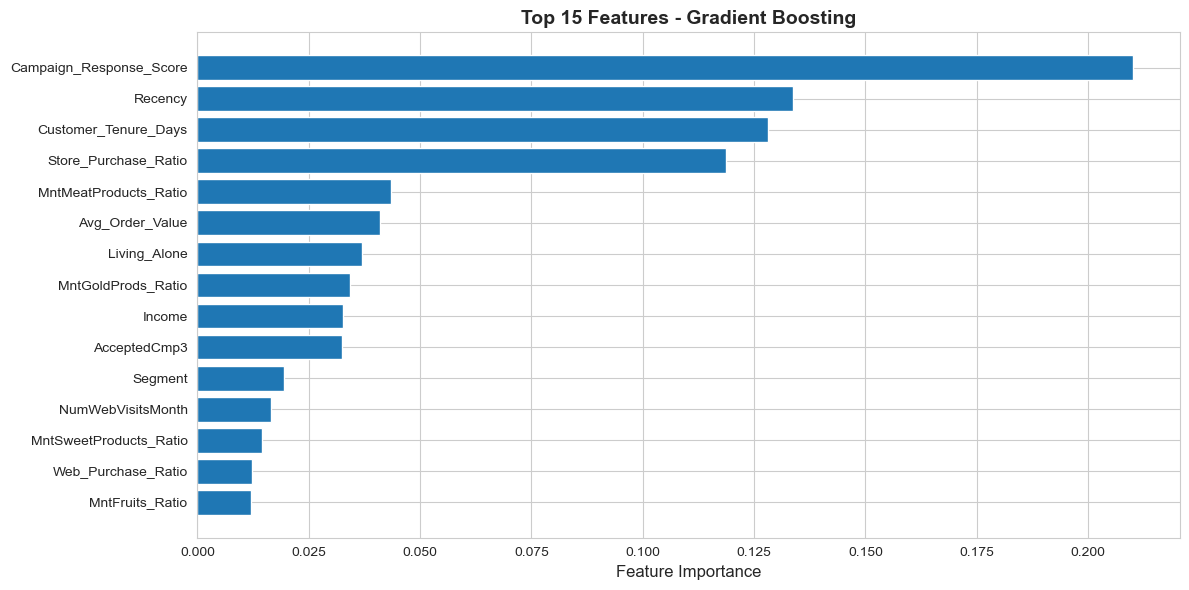

In [211]:
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title(f'Top 15 Features - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [212]:
# Campaign response by segment
df['Response_Probability'] = best_model.predict_proba(X)[:, 1]

segment_response = df.groupby('Segment_Name').agg({
    'Response_Probability': 'mean',
    'Response': 'mean',
    'Campaign_Response_Score': 'mean'
}).round(3)

segment_response.columns = ['Predicted Response Rate', 'Actual Response Rate', 'Avg Campaigns Accepted']
segment_response = segment_response.sort_values('Predicted Response Rate', ascending=False)

print("CAMPAIGN RESPONSE BY SEGMENT")
print(segment_response)

CAMPAIGN RESPONSE BY SEGMENT
                           Predicted Response Rate  Actual Response Rate  \
Segment_Name                                                               
Price-Sensitive Shoppers                     0.530                 0.580   
Budget-Conscious Families                    0.181                 0.180   
High-Value Customers                         0.109                 0.107   
Mature Loyalists                             0.097                 0.093   

                           Avg Campaigns Accepted  
Segment_Name                                       
Price-Sensitive Shoppers                    2.130  
Budget-Conscious Families                   0.206  
High-Value Customers                        0.230  
Mature Loyalists                            0.077  
